467.9999999999964
Index(['Unnamed: 0', 'packetType', 'timestamp_ms', 'imu1_accel_x',
       'imu1_accel_y', 'imu1_accel_z', 'imu1_gyro_x', 'imu1_gyro_y',
       'imu1_gyro_z', 'imu1_mag_x', 'imu1_mag_y', 'imu1_mag_z', 'imu2_accel_x',
       'imu2_accel_y', 'imu2_accel_z', 'imu2_gyro_x', 'imu2_gyro_y',
       'imu2_gyro_z', 'imu2_mag_x', 'imu2_mag_y', 'imu2_mag_z',
       'high_g_accel_x', 'high_g_accel_y', 'high_g_accel_z', 'baro1_temp',
       'baro1_pres', 'baro2_temp', 'baro2_pres', 'gps_lat', 'gps_long',
       'gps_alt', 'gps_fix_quality', 'gps_sats_tracked', 'gps_hdop',
       'battery_voltage', 'pyro_cont', 'trigger_status', 'heading', 'vtg',
       'pos_x', 'pos_y', 'pos_z', 'vel_x', 'vel_y', 'vel_z', 'acc_x', 'acc_y',
       'acc_z', 'q_x', 'q_y', 'q_z', 'q_w', 'state', 'gps_lat_mod',
       'gps_long_mod', 'imu1_accel_x_real', 'imu1_accel_y_real',
       'imu1_accel_z_real', 'imu2_accel_x_real', 'imu2_accel_y_real',
       'imu2_accel_z_real', 'imu1_gyro_x_real', 'imu1_gyro_y

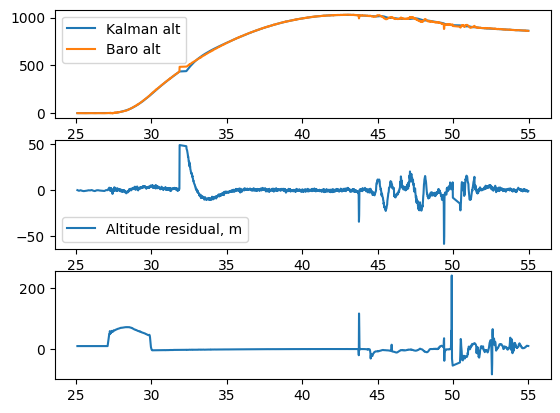

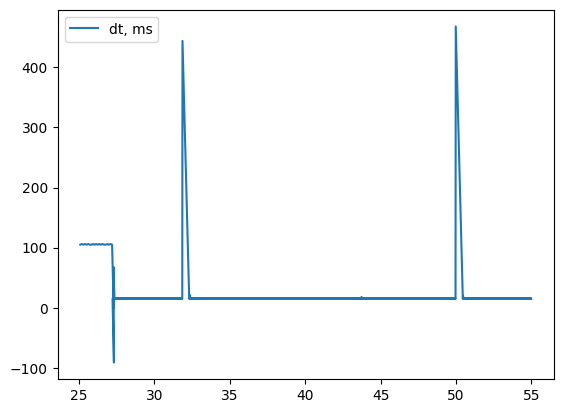

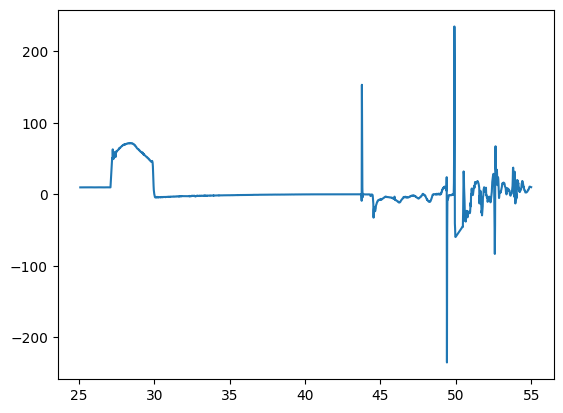

In [23]:
import pandas as pd

lapseRate = -6.5e-3
R_DRY_AIR = 287.053
G_ACCEL_EARTH = 9.80665

csv = pd.read_csv("~/Downloads/2023-04-15-oorr-output-FCB-post.csv")
csv2 = csv.copy()
csv2["timestamp_ms"] -= csv2["timestamp_ms"][0]
csv2["timestamp_ms"] /= 1000
csv2 = csv2[csv2["timestamp_ms"] < 55]
csv2 = csv2[csv2["timestamp_ms"] > 25]


def pressure_to_alt(pressureAtm, tempRefK, pressureRefAtm, agl: bool = True):
    ret = ((tempRefK) / lapseRate) * (pow(pressureAtm / pressureRefAtm, -R_DRY_AIR * lapseRate / G_ACCEL_EARTH) - 1)
    if agl:
        ret = ret - ret.iloc[0]
    return ret


GROUND_TEMP = 20 + 273.15
PRESSURE_REF = 0.993872440167777
pressure_array = csv2["baro_pres_avg"]
baro_alt = pressure_to_alt(pressure_array, GROUND_TEMP, PRESSURE_REF)

# Drop the first baro alt
baro_alt2 = baro_alt.iloc[1:]

pos_z2 = csv2["pos_z"].iloc[:-1]

time = csv2["timestamp_ms"].iloc[:-1]

import matplotlib.pyplot as plt

plt.figure()
plt.subplot(311)
plt.plot(time, pos_z2, label="Kalman alt")
plt.plot(time, baro_alt2, label="Baro alt")
plt.legend()
plt.subplot(312)
plt.plot(time, baro_alt2.to_numpy() - pos_z2.to_numpy(), label="Altitude residual, m")
plt.legend()
plt.subplot(313)
plt.plot(csv2["timestamp_ms"], csv2["acc_z"], label="Accel Z")

plt.figure()
import numpy as np

plt.plot(time, np.diff(csv2["timestamp_ms"]) * 1000, label="dt, ms")
print(max(np.diff(csv2["timestamp_ms"]) * 1000))
plt.legend()

plt.figure()
plt.plot(csv2["timestamp_ms"], csv2["imu1_accel_y_real"])
print(csv2.keys())
plt.show()